# Import Libraries & Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("/content/data.csv")

In [3]:
df.head(50)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.990,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.147100,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.71190,0.26540,0.4601,0.11890
1,842517,M,20.570,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.070170,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.24160,0.18600,0.2750,0.08902
2,84300903,M,19.690,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.127900,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.45040,0.24300,0.3613,0.08758
3,84348301,M,11.420,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.105200,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.68690,0.25750,0.6638,0.17300
4,84358402,M,20.290,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.104300,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.40000,0.16250,0.2364,0.07678
5,843786,M,12.450,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.080890,...,15.470,23.75,103.40,741.6,0.17910,0.52490,0.53550,0.17410,0.3985,0.12440
6,844359,M,18.250,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.074000,...,22.880,27.66,153.20,1606.0,0.14420,0.25760,0.37840,0.19320,0.3063,0.08368
7,84458202,M,13.710,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.059850,...,17.060,28.14,110.60,897.0,0.16540,0.36820,0.26780,0.15560,0.3196,0.11510
8,844981,M,13.000,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.093530,...,15.490,30.73,106.20,739.3,0.17030,0.54010,0.53900,0.20600,0.4378,0.10720
9,84501001,M,12.460,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.085430,...,15.090,40.68,97.65,711.4,0.18530,1.05800,1.10500,0.22100,0.4366,0.20750


# EDA

In [4]:
df["diagnosis"].value_counts()

,count
diagnosis,
B,357
M,212


In [5]:
sum = 212 + 357
proportion = 212 / sum
print("Baseline: " + str(proportion))

Baseline: 0.37258347978910367


<ipython-input-6-725fe5c392e4>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='diagnosis', data=df, palette=colors)


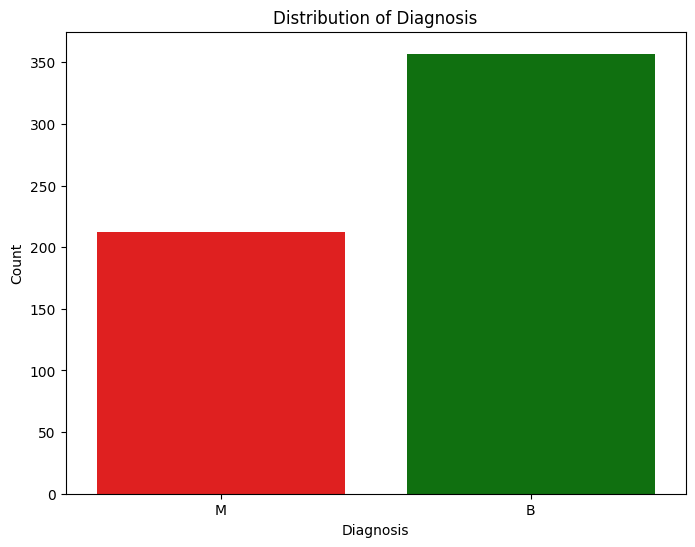

In [6]:
colors = {'M': 'red', 'B': 'green'}


plt.figure(figsize=(8, 6))
sns.countplot(x='diagnosis', data=df, palette=colors)
plt.title('Distribution of Diagnosis')
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.show()


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave_points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

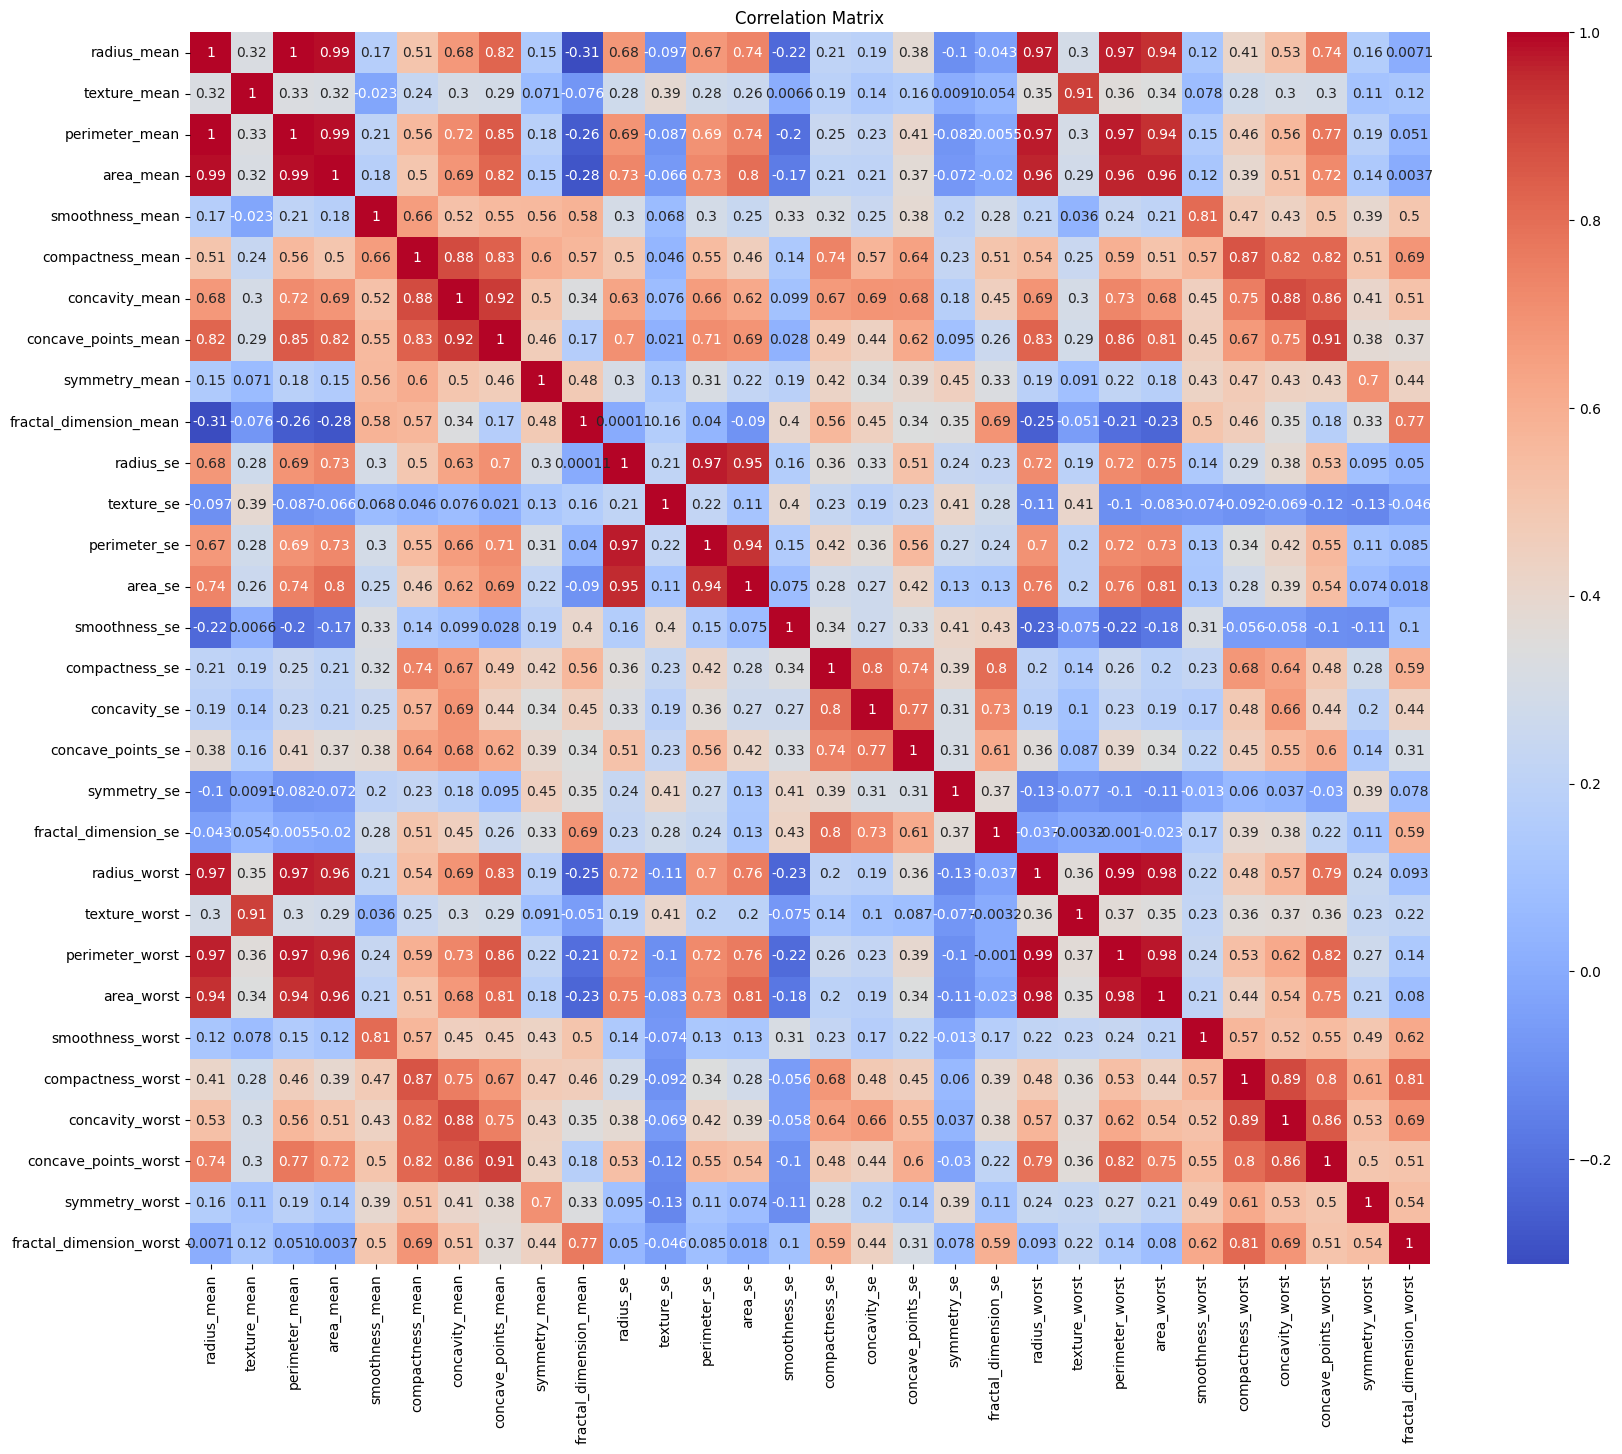

In [8]:
# prompt: generate a heat map correlation matrix of df without "id" or "diagosis"

# Correlation Matrix
df_corr = df.drop(["id", "diagnosis"], axis=1).corr()
plt.figure(figsize=(20, 16))
sns.heatmap(df_corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


# Modeling

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, regularizers



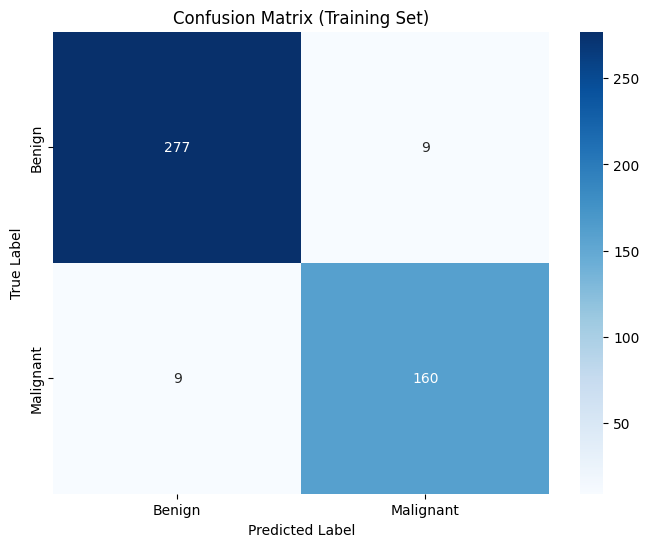

Sensitivity (Training Set): 0.9467
Specificity (Training Set): 0.9685


In [11]:
#Logistic Regression

X_train, X_test, y_train, y_test = train_test_split(df.drop(["id", "diagnosis"], axis=1), df["diagnosis"], test_size=0.2, random_state=42)

# Create and train the logistic regression model
logreg = LogisticRegression(
    class_weight='balanced',
    solver='liblinear',
    penalty='l2',  # L2 regularization to prevent overfitting
    C=1.0,
    max_iter=500,  # Ensures convergence for complex models
    random_state=42  # Ensures reproducibility
)

logreg.fit(X_train, y_train)

# Make predictions on the training set
y_train_pred = logreg.predict(X_train)

# Display the confusion matrix with labels
labels = ['Benign', 'Malignant']  # Replace with your actual labels if different
cm_display = confusion_matrix(y_train, y_train_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_display, annot=True, fmt="d", cmap="Blues",
            xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix (Training Set)')
plt.show()

# Calculate Sensitivity and Specificity
TN, FP, FN, TP = cm_display.ravel()
sensitivity = TP / (TP + FN)
specificity = TN / (TN + FP)

print(f"Sensitivity (Training Set): {sensitivity:.4f}")
print(f"Specificity (Training Set): {specificity:.4f}")


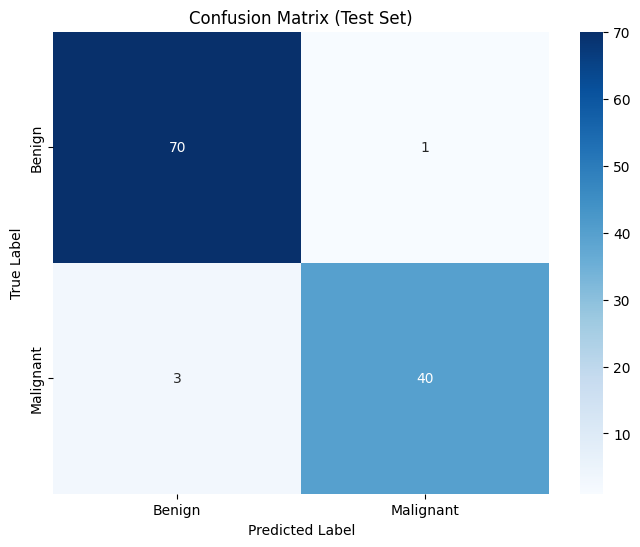

Sensitivity (Test Set): 0.9302
Specificity (Test Set): 0.9859


In [12]:
# Make predictions on the test set
y_test_pred = logreg.predict(X_test)

# Display the confusion matrix with labels
labels = ['Benign', 'Malignant']  # Replace with your actual labels if different
cm_display = confusion_matrix(y_test, y_test_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_display, annot=True, fmt="d", cmap="Blues",
            xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix (Test Set)')
plt.show()

# Calculate Sensitivity and Specificity
TN, FP, FN, TP = cm_display.ravel()
sensitivity = TP / (TP + FN)
specificity = TN / (TN + FP)

print(f"Sensitivity (Test Set): {sensitivity:.4f}")
print(f"Specificity (Test Set): {specificity:.4f}")


In [15]:
x = 110/114
print(x)

0.9649122807017544


<ipython-input-34-aeaeab4f31c3>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=top_5_features, palette="viridis")


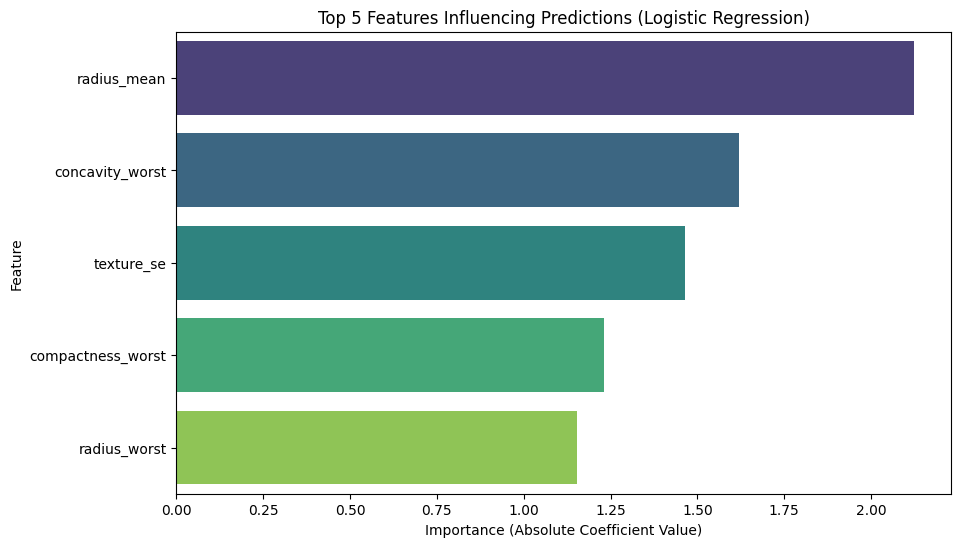

Top 5 Features:


,Feature,Importance
0,radius_mean,2.124538
26,concavity_worst,1.619938
11,texture_se,1.464836
25,compactness_worst,1.231247
20,radius_worst,1.153986


In [34]:
# Get feature importances from the trained logistic regression model
feature_importances = logreg.coef_[0]

# Create a DataFrame to store feature names and their importances
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': np.abs(feature_importances)})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)


# Select the top 5 features
top_5_features = feature_importance_df.head(5)


# Create a horizontal bar plot for visualization
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=top_5_features, palette="viridis")
plt.title('Top 5 Features Influencing Predictions (Logistic Regression)')
plt.xlabel('Importance (Absolute Coefficient Value)')
plt.ylabel('Feature')
plt.show()


# Display the top 5 features in a table
print("Top 5 Features:")
top_5_features


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.4s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    0.0s finished


Sensitivity (Random Forest): 0.9767
Specificity (Random Forest): 0.9859


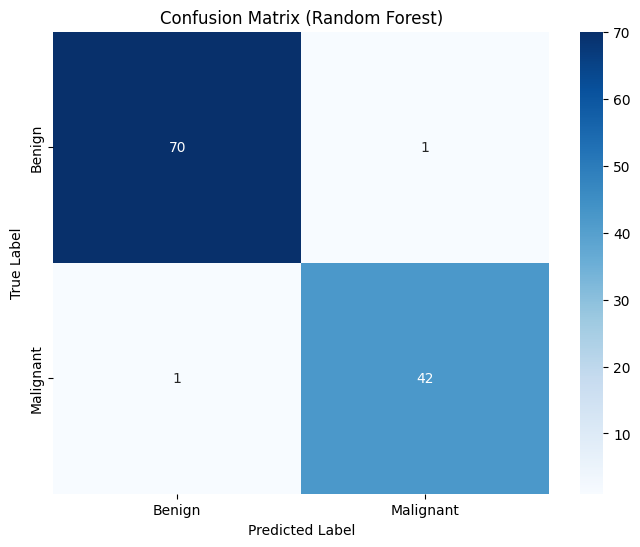

In [21]:
# Random Forest

rf_classifier = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    class_weight={"M": 2.5, "B": 1},
    max_depth=10,
    min_samples_split=5,
    min_samples_leaf=2,
    max_features='sqrt',
    bootstrap=True,
    criterion='gini',
    oob_score=True,
    n_jobs=-1,
    verbose=1,
    warm_start=True
)

rf_classifier.fit(X_train, y_train)
y_pred_rf = rf_classifier.predict(X_test)

# Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Display the confusion matrix with labels
labels = ['Benign', 'Malignant']
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix (Random Forest)')

# Calculate Sensitivity and Specificity
TN, FP, FN, TP = cm_rf.ravel()
sensitivity_rf = TP / (TP + FN)
specificity_rf = TN / (TN + FP)

print(f"Sensitivity (Random Forest): {sensitivity_rf:.4f}")
print(f"Specificity (Random Forest): {specificity_rf:.4f}")

plt.show()


[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    0.0s finished


Sensitivity (Random Forest - Test Set): 0.9767
Specificity (Random Forest - Test Set): 0.9859


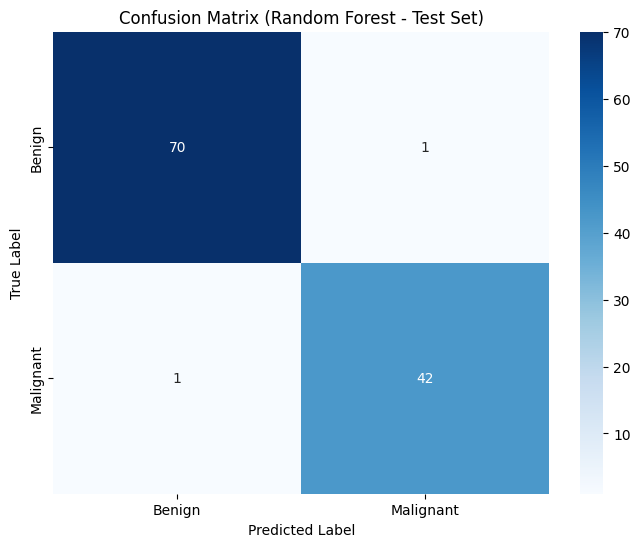

In [36]:
# Assuming 'rf_classifier', 'X_test', and 'y_test' are already defined from the previous code.
y_pred_rf = rf_classifier.predict(X_test)

# Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Display the confusion matrix with labels
labels = ['Benign', 'Malignant']
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix (Random Forest - Test Set)')

# Calculate Sensitivity and Specificity
TN, FP, FN, TP = cm_rf.ravel()
sensitivity_rf = TP / (TP + FN)
specificity_rf = TN / (TN + FP)

print(f"Sensitivity (Random Forest - Test Set): {sensitivity_rf:.4f}")
print(f"Specificity (Random Forest - Test Set): {specificity_rf:.4f}")

plt.show()


In [24]:
x = 112/114
print(x)

0.9824561403508771


<ipython-input-26-472a1bb1e7d8>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=top_5_features_rf, palette="viridis")


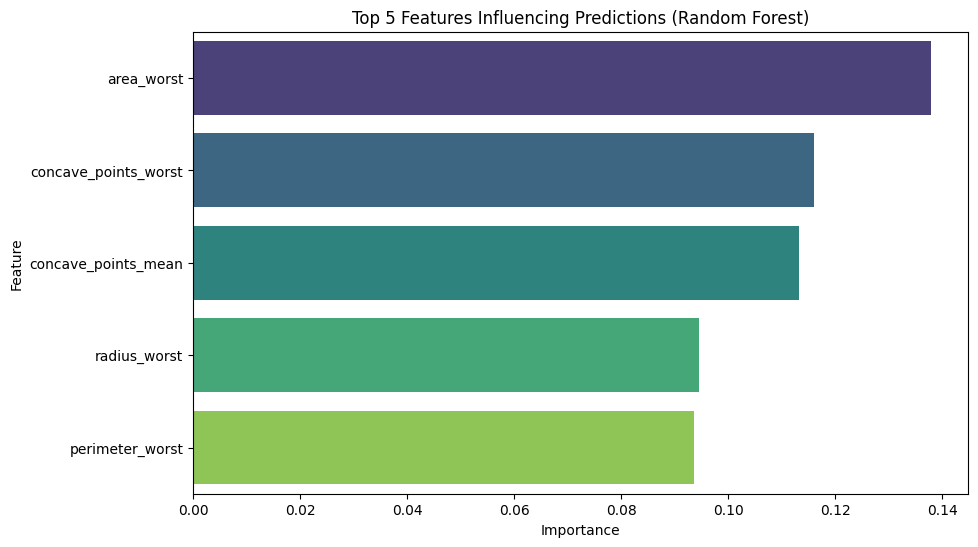

Top 5 Features (Random Forest):


,Feature,Importance
23,area_worst,0.137981
27,concave_points_worst,0.116126
7,concave_points_mean,0.113244
20,radius_worst,0.094486
22,perimeter_worst,0.093556


In [26]:
# Get feature importances from the trained random forest model
feature_importances_rf = rf_classifier.feature_importances_

# Create a DataFrame to store feature names and their importances
feature_importance_df_rf = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances_rf})

# Sort the DataFrame by importance in descending order
feature_importance_df_rf = feature_importance_df_rf.sort_values(by='Importance', ascending=False)

# Select the top 5 features
top_5_features_rf = feature_importance_df_rf.head(5)

# Create a horizontal bar plot for visualization
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=top_5_features_rf, palette="viridis")
plt.title('Top 5 Features Influencing Predictions (Random Forest)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

# Display the top 5 features in a table
print("Top 5 Features (Random Forest):")
top_5_features_rf


In [37]:
# Define the model
model = keras.Sequential([
    layers.Dense(32, activation='relu', input_shape=(X_train.shape[1],),
                 kernel_initializer='he_uniform', kernel_regularizer=regularizers.l2(0.02)),
    layers.BatchNormalization(),
    layers.Dropout(0.4),

    layers.Dense(16, activation='relu',
                 kernel_initializer='he_uniform', kernel_regularizer=regularizers.l2(0.02)),
    layers.BatchNormalization(),
    layers.Dropout(0.4),

    layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Convert labels to numerical values (0 and 1)
y_train_num = np.where(y_train == 'M', 1, 0)
y_test_num = np.where(y_test == 'M', 1, 0)

# Train the model
model.fit(X_train, y_train_num, epochs=10, batch_size=32, validation_split=0.2)



Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.5027 - loss: 2.7590 - val_accuracy: 0.3626 - val_loss: 3.0341
Epoch 2/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5436 - loss: 2.5169 - val_accuracy: 0.3626 - val_loss: 2.8747
Epoch 3/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.7375 - loss: 2.1785 - val_accuracy: 0.3736 - val_loss: 2.6341
Epoch 4/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7425 - loss: 1.9895 - val_accuracy: 0.4176 - val_loss: 2.4129
Epoch 5/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7471 - loss: 1.9251 - val_accuracy: 0.4725 - val_loss: 2.1418
Epoch 6/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8295 - loss: 1.6728 - val_accuracy: 0.5495 - val_loss: 1.9232
Epoch 7/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8064 - loss: 1.6044 - val_accuracy: 0.7143 - val_loss: 1.7259
Epoch 8/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8410 - loss: 1.4877 - val_accuracy: 0.7692 - val_loss: 1.

1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Sensitivity (Neural Network): 1.0000
Specificity (Neural Network): 0.8592


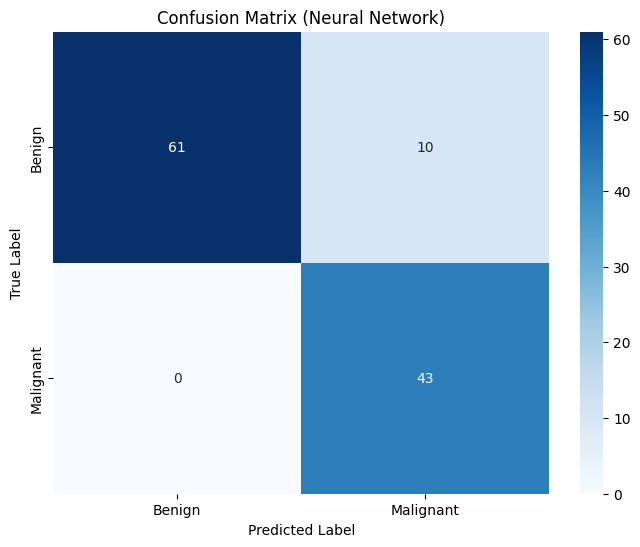

In [38]:
# Make predictions on the test set
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

# Confusion Matrix
cm = confusion_matrix(y_test_num, y_pred)

# Display the confusion matrix with labels
labels = ['Benign', 'Malignant']
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix (Neural Network)')

# Calculate Sensitivity and Specificity
TN, FP, FN, TP = cm.ravel()
sensitivity = TP / (TP + FN)
specificity = TN / (TN + FP)

print(f"Sensitivity (Neural Network): {sensitivity:.4f}")
print(f"Specificity (Neural Network): {specificity:.4f}")

plt.show()

In [33]:
x = 103/114

print(x)

0.9035087719298246
